In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Loading Dataset

In [6]:
df =pd.read_csv('abalone.csv')

In [7]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Univariate Analysis

<AxesSubplot: xlabel='Rings', ylabel='Density'>

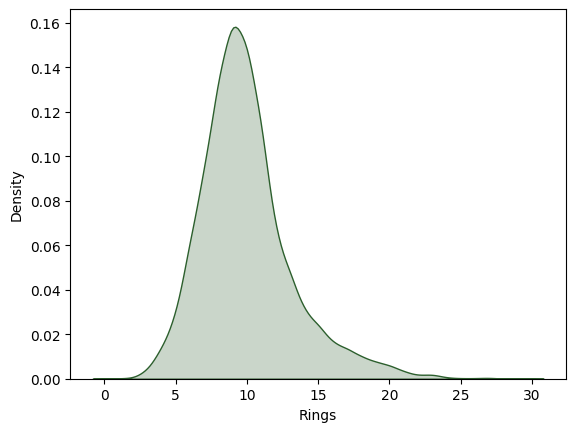

In [9]:
sns.kdeplot(df['Rings'], fill=True, color="#2C5F2D")

Bi-Variate Analysis

<AxesSubplot: ylabel='Length'>

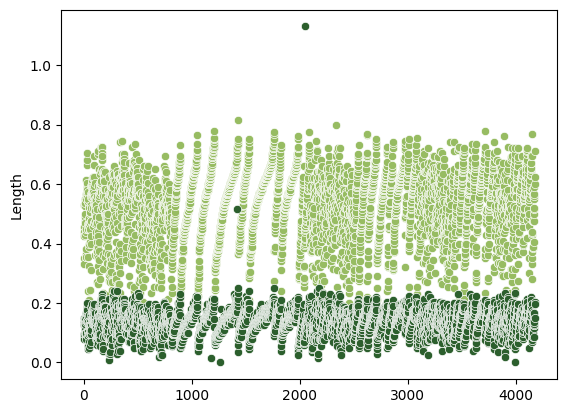

In [10]:
sns.scatterplot(df["Length"],color='#97BC62FF') 
sns.scatterplot(df["Height"],color='#2C5F2D') 

Multi-Variate

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


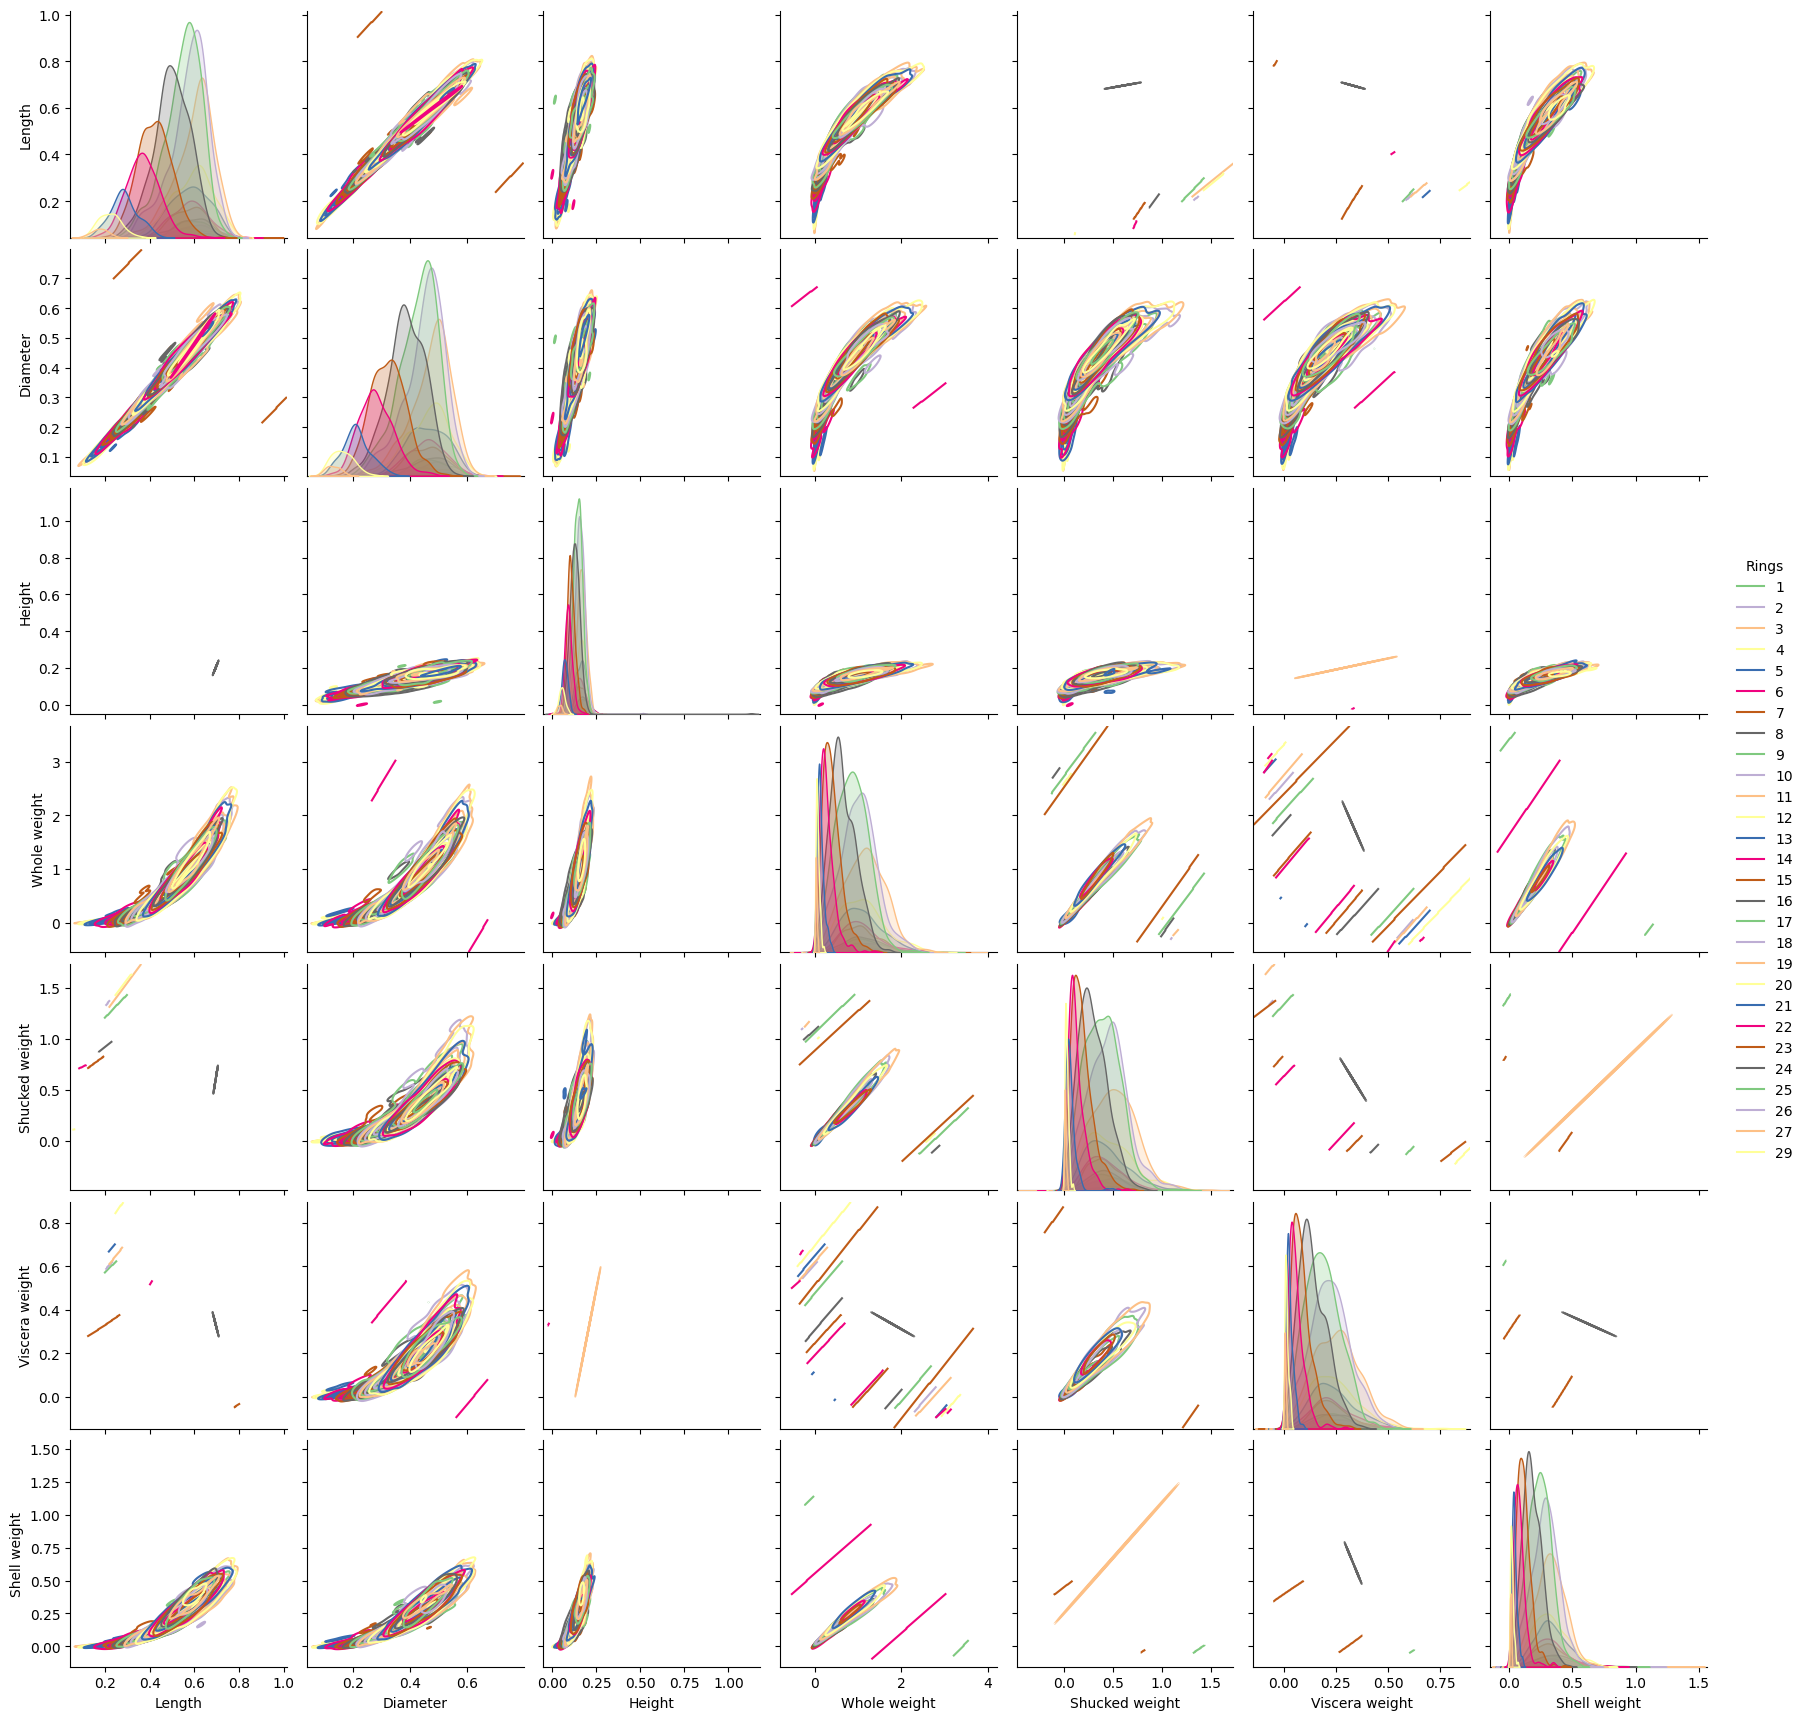

In [11]:
sns.pairplot(df, kind="kde", hue="Rings", palette="Accent")

Descriptive Stats

In [12]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


Missing Values

In [13]:
df.dropna()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


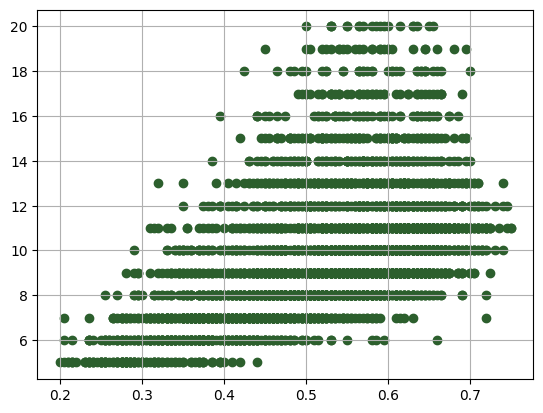

In [47]:
plt.scatter(x = df['Length'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

In [48]:
df = df[(df['Length'] <= 0.8) & (df['Length'] >= 0.2) & (df['Rings'] <= 20) & (df['Rings'] >= 5)]

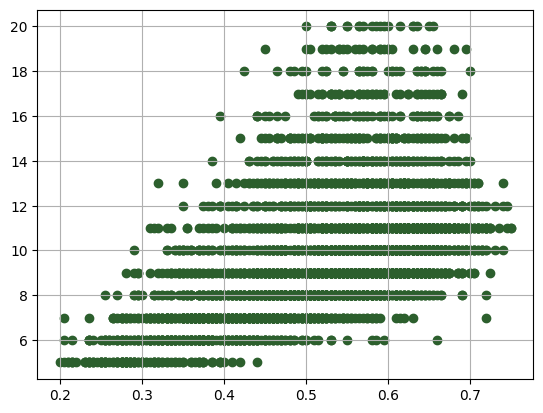

In [49]:
plt.scatter(x = df['Length'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

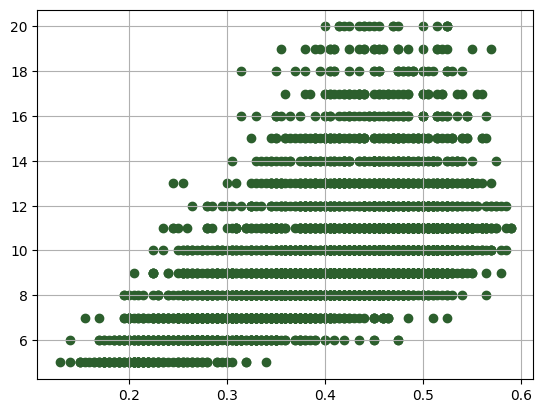

In [50]:
plt.scatter(x = df['Diameter'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

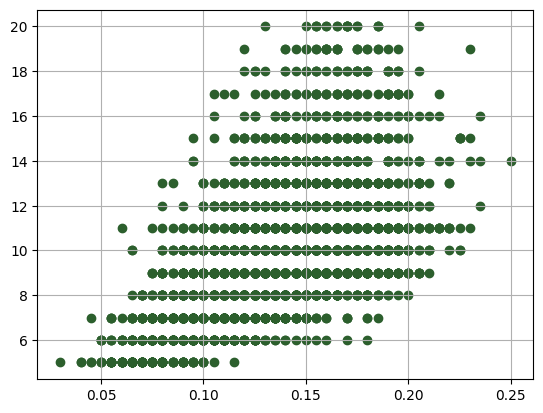

In [51]:
plt.scatter(x = df['Height'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

In [52]:
df = df[(df['Height'] >= 0.03) & (df['Height'] <= 0.3)]

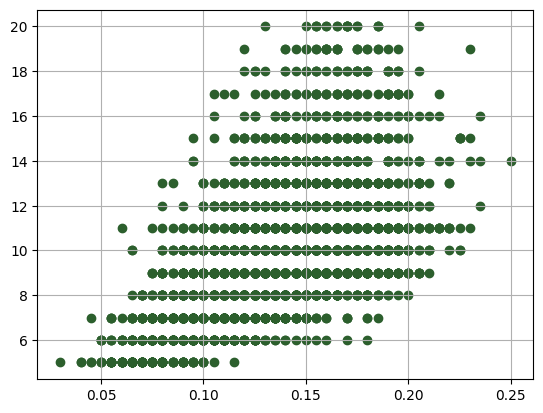

In [53]:
plt.scatter(x = df['Height'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

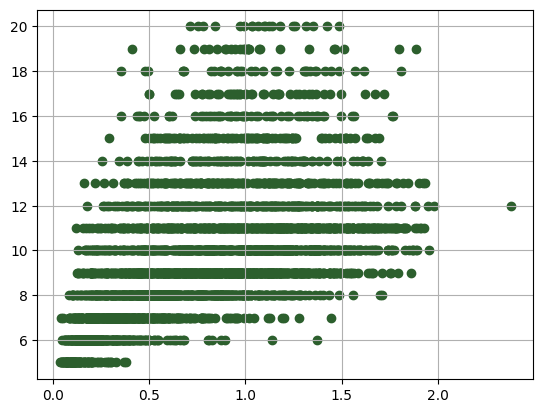

In [54]:
plt.scatter(x = df['Whole weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

In [55]:
df = df[(df['Whole weight'] <= 2.5)]

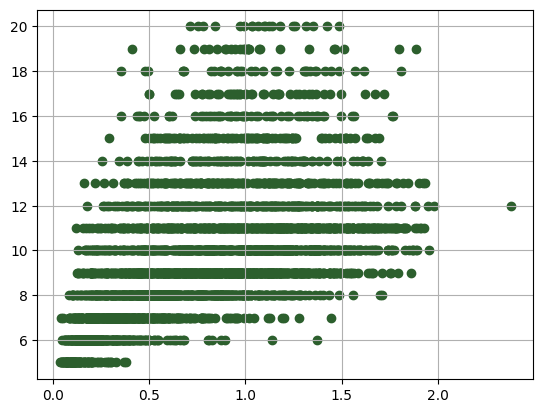

In [56]:
plt.scatter(x = df['Whole weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

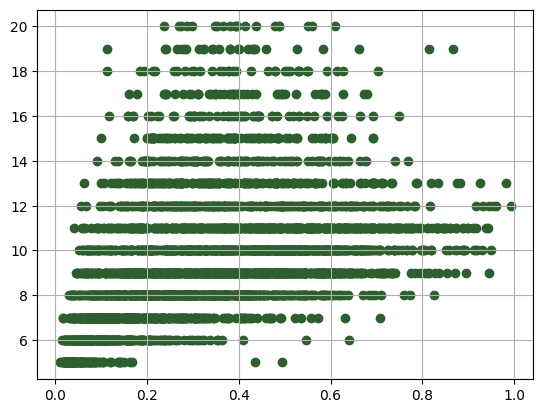

In [57]:
plt.scatter(x = df['Shucked weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

In [58]:
df = df[(df['Shucked weight'] <= 1)]

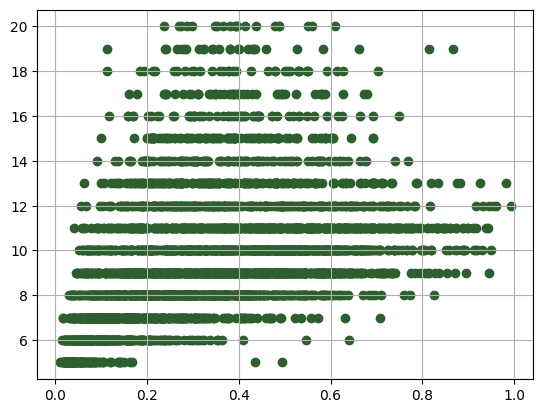

In [59]:
plt.scatter(x = df['Shucked weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

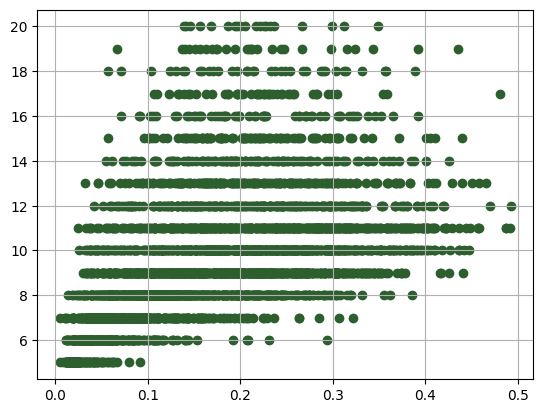

In [60]:
plt.scatter(x = df['Viscera weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

In [61]:
df = df[(df['Viscera weight'] <= 0.5)]

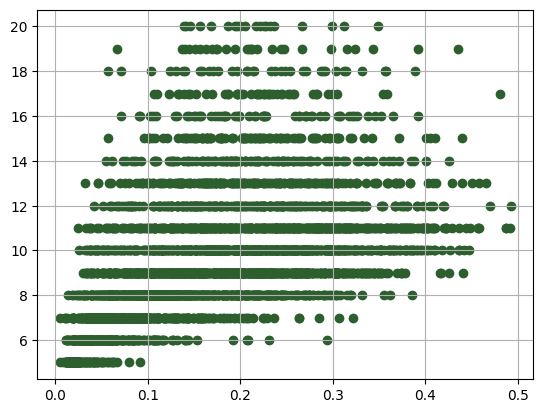

In [62]:
plt.scatter(x = df['Viscera weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

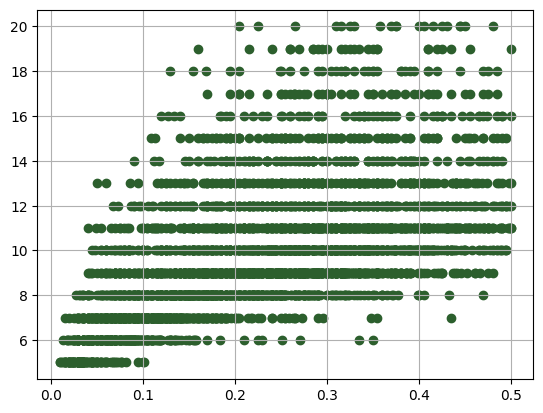

In [63]:
plt.scatter(x = df['Shell weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

In [64]:
df = df[(df['Shell weight'] <= 0.5)]

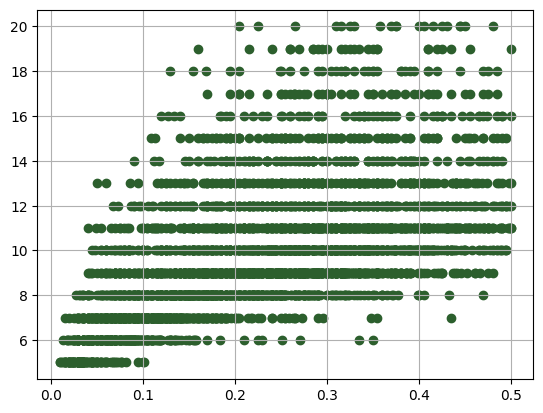

In [65]:
plt.scatter(x = df['Shell weight'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

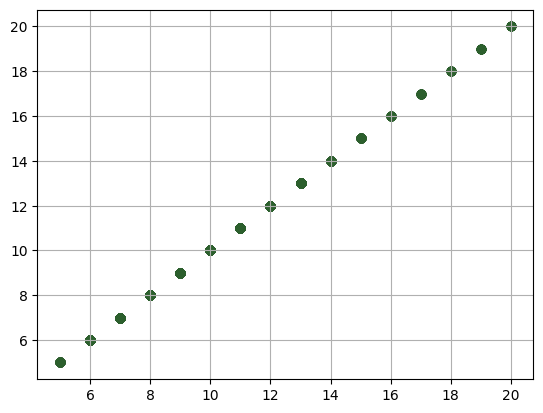

In [66]:
plt.scatter(x = df['Rings'], y = df['Rings'], c="#2C5F2D")
plt.grid(True)

Encoding

In [67]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [68]:
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([2, 0, 1], dtype=int64)

In [69]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Splitting

In [70]:
x = df
y = df['Rings']+1.5

In [71]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [72]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Rings, Length: 3893, dtype: float64

Model Building

In [73]:
standardScale = StandardScaler()
x=standardScale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [74]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [75]:
regressor.fit(x_train, y_train)
regressor.score(x_train,y_train)*100

100.0

In [76]:
regressor.fit(x_test, y_test)
regressor.score(x_test,y_test)*100

99.99997850583188